# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

在此项目中，将以一名数据分析师的身份执行数据的探索性分析。在分析数据之前，先提出几个问题，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利，哪位指挥官出现的次数最多？哪种战争类型占比重最多，哪种战争结果最多从攻击方的角度看？在战争获胜的情况下，攻击方力量的大小，防守方力量的大小，和战争是否发生在夏天，这些变量各自和什么变量高度相关？



在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [1]:
# 加载数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.mlab as mlab
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator
import seaborn as sns
% matplotlib inline

In [2]:
# 务必包含一个‘magic word’（带有“%”的***），以便将视图
# 与 notebook 保持一致。关于更多信息，请访问该网页：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%magic

In [3]:
# 加载数据集和前几行
df=pd.read_csv('battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
# 加载最后几行
df.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [5]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [6]:
#用convert_objects转换数据为数字型
df=df.convert_objects(convert_numeric=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [7]:
#再次查看数据类型和信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [8]:
#查看每个列的缺失值数量
df.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

In [9]:
#看哪一列还有空值 - 应显示为“假”
df.isnull().any()

name                  False
year                  False
battle_number         False
attacker_king          True
defender_king          True
attacker_1            False
attacker_2             True
attacker_3             True
attacker_4             True
defender_1             True
defender_2             True
defender_3             True
defender_4             True
attacker_outcome       True
battle_type            True
major_death            True
major_capture          True
attacker_size          True
defender_size          True
attacker_commander     True
defender_commander     True
summer                 True
location               True
region                False
note                   True
dtype: bool

In [10]:
#用0填充缺失值
df.fillna(0, downcast = 'infer',inplace = True)

In [11]:
#再次查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         38 non-null object
defender_king         38 non-null object
attacker_1            38 non-null object
attacker_2            38 non-null object
attacker_3            38 non-null object
attacker_4            38 non-null object
defender_1            38 non-null object
defender_2            38 non-null object
defender_3            38 non-null int64
defender_4            38 non-null int64
attacker_outcome      38 non-null object
battle_type           38 non-null object
major_death           38 non-null int64
major_capture         38 non-null int64
attacker_size         38 non-null int64
defender_size         38 non-null int64
attacker_commander    38 non-null object
defender_commander    38 non-null object
summer                38 non-null int64
loca

In [12]:
#看哪一列还有空值 - 应显示为“假”
df.isnull().any()

name                  False
year                  False
battle_number         False
attacker_king         False
defender_king         False
attacker_1            False
attacker_2            False
attacker_3            False
attacker_4            False
defender_1            False
defender_2            False
defender_3            False
defender_4            False
attacker_outcome      False
battle_type           False
major_death           False
major_capture         False
attacker_size         False
defender_size         False
attacker_commander    False
defender_commander    False
summer                False
location              False
region                False
note                  False
dtype: bool

In [13]:
#查看冗余行的总和
sum(df.duplicated())

0

In [14]:
#查看数据的行数
df.shape

(38, 25)

In [15]:
#查看数据每列的索引号和标签
for i, v in enumerate(df.columns):
    print(i, v)

0 name
1 year
2 battle_number
3 attacker_king
4 defender_king
5 attacker_1
6 attacker_2
7 attacker_3
8 attacker_4
9 defender_1
10 defender_2
11 defender_3
12 defender_4
13 attacker_outcome
14 battle_type
15 major_death
16 major_capture
17 attacker_size
18 defender_size
19 attacker_commander
20 defender_commander
21 summer
22 location
23 region
24 note


In [16]:
#选择从第一行到最后一行，name到最note列的所有列
df.loc[:,'name':'note']

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,...,1,0,15000,4000,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Baratheon,...,1,0,0,120,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,...,0,1,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,0,0,0,Lannister,...,1,1,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork,The Riverlands,0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,1,1,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,0
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,0,0,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,0
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Darry,...,0,0,0,0,Gregor Clegane,Lyman Darry,1,Darry,The Riverlands,0
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,0,0,Victarion Greyjoy,0,1,Moat Cailin,The North,0
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,1000,0,Asha Greyjoy,0,1,Deepwood Motte,The North,0
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,264,0,Theon Greyjoy,0,1,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [17]:
#加载第4到40行
df.loc[4:20]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,1,1,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,0
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,0,0,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,0
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Darry,...,0,0,0,0,Gregor Clegane,Lyman Darry,1,Darry,The Riverlands,0
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,0,0,Victarion Greyjoy,0,1,Moat Cailin,The North,0
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,1000,0,Asha Greyjoy,0,1,Deepwood Motte,The North,0
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,264,0,Theon Greyjoy,0,1,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...
10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,0,0,0,Greyjoy,...,0,0,244,900,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,1,Torrhen's Square,The North,Greyjoy's troop number comes from the 264 esti...
11,Battle of Winterfell,299,12,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,1,20,0,Theon Greyjoy,Bran Stark,1,Winterfell,The North,It isn't mentioned how many Stark men are left...
12,Sack of Torrhen's Square,299,13,Balon/Euron Greyjoy,Balon/Euron Greyjoy,Greyjoy,0,0,0,Stark,...,0,1,0,0,Dagmer Cleftjaw,0,1,Torrhen's Square,The North,0
13,Sack of Winterfell,299,14,Joffrey/Tommen Baratheon,Robb Stark,Bolton,Greyjoy,0,0,Stark,...,1,0,618,2000,"Ramsay Snow, Theon Greyjoy","Rodrik Cassel, Cley Cerwyn, Leobald Tallhart",1,Winterfell,The North,Since House Bolton betrays the Starks for Hous...


In [18]:
#加载第一行到第28行
#第一列name到location列的所有数据
df.loc[1:28,'name':'location'] 

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Baratheon,...,win,ambush,1,0,0,120,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,...,win,pitched battle,0,1,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,0,0,0,Lannister,...,loss,pitched battle,1,1,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,win,ambush,1,1,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,win,ambush,0,0,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Darry,...,win,pitched battle,0,0,0,0,Gregor Clegane,Lyman Darry,1,Darry
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,win,pitched battle,0,0,0,0,Victarion Greyjoy,0,1,Moat Cailin
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,win,siege,0,0,1000,0,Asha Greyjoy,0,1,Deepwood Motte
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,win,ambush,0,0,264,0,Theon Greyjoy,0,1,Stony Shore
10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,0,0,0,Greyjoy,...,win,pitched battle,0,0,244,900,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,1,Torrhen's Square


In [19]:
#显示所有列的均值
df.mean()

year              299.105263
battle_number      19.500000
defender_3          0.000000
defender_4          0.000000
major_death         0.342105
major_capture       0.289474
attacker_size    6279.500000
defender_size    3214.078947
summer              0.684211
dtype: float64

In [20]:
#显示数据所有列的最大值
df.max()

name             The Red Wedding
year                         300
battle_number                 38
attacker_1                 Stark
defender_3                     0
defender_4                     0
major_death                    1
major_capture                  1
attacker_size             100000
defender_size              20000
summer                         1
region           The Westerlands
dtype: object

In [21]:
#返回数据所有列的最小值
df.min()

name             Battle at the Mummer's Ford
year                                     298
battle_number                              1
attacker_1                         Baratheon
defender_3                                 0
defender_4                                 0
major_death                                0
major_capture                              0
attacker_size                              0
defender_size                              0
summer                                     0
region                       Beyond the Wall
dtype: object

## 下面到了数据探索分析阶段，将通过可视化来分析、解决问题。

第一个问题：哪一个区域发生了最多的战争？

In [22]:
#通过groupby函数战争区域的数量总和，筛选后的数据命名为battle_region
battle_region=df.groupby('region').name.count()
battle_region

region
Beyond the Wall     1
The Crownlands      2
The North          10
The Reach           2
The Riverlands     17
The Stormlands      3
The Westerlands     3
Name: name, dtype: int64

In [23]:
#用sort_values函数将战争区域总和按从多到少排序
battle_region.sort_values(ascending=False, inplace=True)
battle_region

region
The Riverlands     17
The North          10
The Westerlands     3
The Stormlands      3
The Reach           2
The Crownlands      2
Beyond the Wall     1
Name: name, dtype: int64

由此看出，发生战争次数最多的地区是 The Riverlands, 一共有17次；其次是The North, 一共有10次战争。

**第二个问题是：哪一个国王获得了最多的胜利？**

首先来看攻击方的国王

In [24]:
#用query函数筛选出战争结果为获胜
#通过groupby函数分类攻击方国王的数量每个名字出现的总和，筛选后的数据命名为attacker_king_numbers
attacker_king_numbers=attacker_king_numbers=df.query('attacker_outcome == "win"').groupby('attacker_king').name.count()
attacker_king_numbers

attacker_king
0                            2
Balon/Euron Greyjoy          7
Joffrey/Tommen Baratheon    13
Robb Stark                   8
Stannis Baratheon            2
Name: name, dtype: int64

In [25]:
#用sort_values函数将攻击方的国王数量总和按从多到少排序
attacker_king_numbers.sort_values(ascending=False, inplace=True)
attacker_king_numbers

attacker_king
Joffrey/Tommen Baratheon    13
Robb Stark                   8
Balon/Euron Greyjoy          7
Stannis Baratheon            2
0                            2
Name: name, dtype: int64

In [26]:
battle_frame=pd.read_csv("battles.csv")
battle_frame_copy=battle_frame.copy()

                          loss   win     ratio
attacker_king                                 
Balon/Euron Greyjoy        0.0   7.0  1.000000
Joffrey/Tommen Baratheon   1.0  13.0  0.928571
Robb Stark                 2.0   8.0  0.800000
Stannis Baratheon          2.0   2.0  0.500000


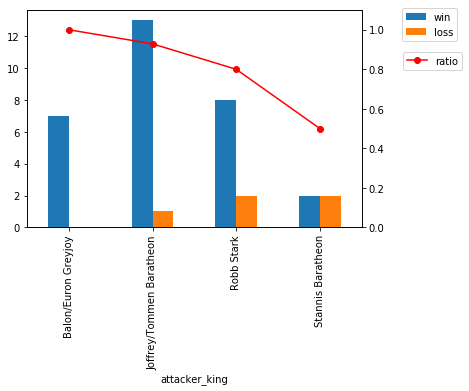

In [27]:
##用柱状图和折线图画出攻击方国王获胜的数量总和，和输赢比例
df_r = battle_frame_copy.groupby(['attacker_king', 'attacker_outcome']).name.count().unstack()

df_r.columns.name = None
df_r.fillna(0, inplace = True)
df_r["ratio"] = df_r["win"]/(df_r["win"]+df_r["loss"])
print(df_r)
#绘图
ax1 = df_r[["win","loss"]].plot(kind = 'bar')
ax2 = ax1.twinx()
ax2.set_ylim(0,1.1)
ax2.plot(df_r.index,df_r["ratio"], 'ro-')
# # ro- 是一种格式简写，r-read,o-标点，- -折线 
ax1.legend(bbox_to_anchor=(1.3, 1.03))
plt.legend(bbox_to_anchor=(1.315, 0.83))
plt.show()

进攻方国王获胜最多的是Joffrey/Tommen Baratheon（其中，Joffrey继承了Tommen Baratheon的王位), 一共获胜了13次，第二名是Robb Stark，获胜了8次， 然后是Balon/Euron Greyjoy, Stannis Baratheon, 分别是7次和2次。

**再来看防守方的国王**

In [28]:
#用query函数筛选出战争结果为获胜
#通过groupby函数分类防守方国王每个名字出现的数量总和，筛选后的数据命名为defender_king
defender_king_numbers=attacker_king_numbers=df.query('attacker_outcome == "win"').groupby('defender_king').name.count()
defender_king_numbers

defender_king
0                            3
Balon/Euron Greyjoy          4
Joffrey/Tommen Baratheon     9
Renly Baratheon              1
Robb Stark                  13
Stannis Baratheon            2
Name: name, dtype: int64

In [29]:
#用sort_values函数将防守方国王按从多到少排序
defender_king_numbers.sort_values(ascending=False, inplace=True)
defender_king_numbers

defender_king
Robb Stark                  13
Joffrey/Tommen Baratheon     9
Balon/Euron Greyjoy          4
0                            3
Stannis Baratheon            2
Renly Baratheon              1
Name: name, dtype: int64

                          loss   win     ratio
defender_king                                 
Balon/Euron Greyjoy        0.0   4.0  1.000000
Joffrey/Tommen Baratheon   3.0   9.0  0.750000
Mance Rayder               1.0   0.0  0.000000
Renly Baratheon            0.0   1.0  1.000000
Robb Stark                 1.0  13.0  0.928571
Stannis Baratheon          0.0   2.0  1.000000


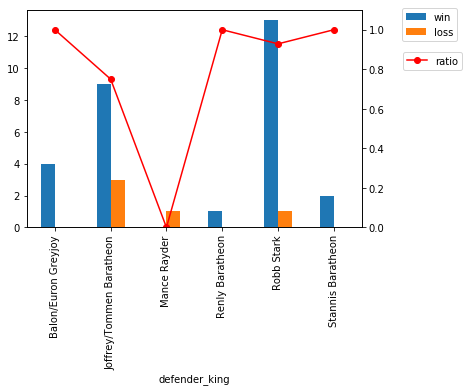

In [30]:
#用柱状图和折线图画出防守方国王获胜的数量总和，和输赢比例
df_r = battle_frame_copy.groupby(['defender_king', 'attacker_outcome']).name.count().unstack()

df_r.columns.name = None
df_r.fillna(0, inplace = True)
df_r["ratio"] = df_r["win"]/(df_r["win"]+df_r["loss"])
print(df_r)
#绘图
ax1 = df_r[["win","loss"]].plot(kind = 'bar')
ax2 = ax1.twinx()
ax2.set_ylim(0,1.1)
ax2.plot(df_r.index,df_r["ratio"], 'ro-')
# # ro- 是一种格式简写，r-read,o-标点，- -折线 
ax1.legend(bbox_to_anchor=(1.3, 1.03))
plt.legend(bbox_to_anchor=(1.315, 0.83))
plt.show()

从防守方来看，Robb Stark获胜最多，一共获胜了13次，Joffrey/Tommen Baratheon获胜排名第二，一共获胜了9次，接下来是Balon/Euron Greyjoy (获胜4次）， Stannis Baratheon (获胜2次), Renly Baratheon(获胜1次)。

小结: 从进攻方来看，Joffrey/Tommen Baratheon获胜最多(13次），Robb Stark获胜第二多(8次)；从防守方来看，Robb Stark获胜最多（13次), Joffrey/Tommen Baratheon获胜第二多（9次）；综合进攻方和防守方的结果，进攻方加上防守方的总和，Joffrey/Tommen Baratheon 一共获胜13+9=22次，Robb Stark一共获胜13+8=21次；所以，从进攻方和防守方国王获胜总和来看，Joffrey/Tommen Baratheon获胜最多，获胜22次。

**第三个问题：哪种战争类型占比重最多，哪种战争结果最多从攻击方的角度看？**

In [31]:
#通过groupby函数分类每个战争类型的数量总和，筛选后的数据命名为battle_type_sum
battle_type_sum=df.groupby('battle_type').name.count()
battle_type_sum

battle_type
0                  1
ambush            10
pitched battle    14
razing             2
siege             11
Name: name, dtype: int64

In [32]:
#用sort_values函数将战争类型按从多到少排序
battle_type_sum.sort_values(ascending=False, inplace=True)
battle_type_sum

battle_type
pitched battle    14
siege             11
ambush            10
razing             2
0                  1
Name: name, dtype: int64

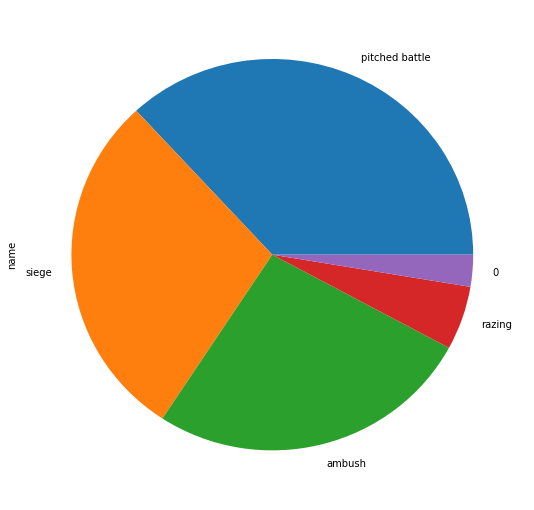

In [33]:
#用饼图画出每个战争类型的数量总和
battle_type_sum.plot(kind='pie', figsize=(9,9));

从数据结果知道，占比重最多的战争类型是pitched battle(14)，然后是siege(11)， ambush(10)，最少的是razing(2)。


现在将战争结果分类

In [34]:
#通过groupby函数分类每个战争结果的数量总和，筛选后的数据命名为outcome
outcome=df.groupby('attacker_outcome').battle_type.count()
outcome

attacker_outcome
0        1
loss     5
win     32
Name: battle_type, dtype: int64

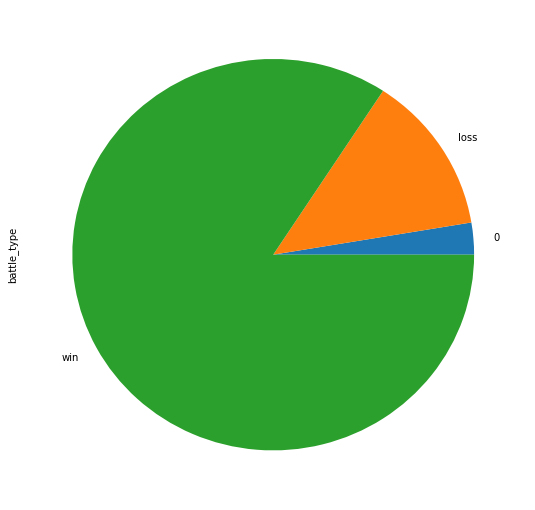

In [35]:
#用饼图画出战争结果
outcome.plot(kind='pie', figsize=(9,9));

从战争结果看，大部分的结果都是赢（32），有5次是输，1次是没有结果。

第四个问题：在战争获胜的情况下，攻击方力量的大小，防守方力量的大小，和战争是否发生在夏天，各自和什么变量高度相关？

In [36]:
#用query函数选取战争结果为赢的数据，命名为df1
df1=df.query('attacker_outcome=="win"')
df1

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,...,1,0,15000,4000,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Baratheon,...,1,0,0,120,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Tully,...,0,1,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,1,1,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,0
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,0,0,Lannister,...,0,0,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,0
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,0,0,0,Darry,...,0,0,0,0,Gregor Clegane,Lyman Darry,1,Darry,The Riverlands,0
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,0,0,Victarion Greyjoy,0,1,Moat Cailin,The North,0
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,1000,0,Asha Greyjoy,0,1,Deepwood Motte,The North,0
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,0,0,0,Stark,...,0,0,264,0,Theon Greyjoy,0,1,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...
10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,0,0,0,Greyjoy,...,0,0,244,900,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,1,Torrhen's Square,The North,Greyjoy's troop number comes from the 264 esti...


In [37]:
#查看df1数据集的相关系数，并将结果用df2命名
#用corr()函数，相关系数的取值范围在[-1,1]之间，取值越靠近1，说明相关程度越大
df2=df1.corr()
df2

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.900265,NaN,NaN,-0.393921,-0.186220,-0.401511,-0.392542,-0.801490
battle_number,0.900265,1.000000,NaN,NaN,-0.315683,-0.098090,-0.360942,-0.335828,-0.792644
defender_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defender_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_death,-0.393921,-0.315683,NaN,NaN,1.000000,0.120386,0.215463,0.367027,0.421741
major_capture,-0.186220,-0.098090,NaN,NaN,0.120386,1.000000,0.187029,0.165078,0.233550
attacker_size,-0.401511,-0.360942,NaN,NaN,0.215463,0.187029,1.000000,0.529425,0.199065
defender_size,-0.392542,-0.335828,NaN,NaN,0.367027,0.165078,0.529425,1.000000,0.251072
summer,-0.801490,-0.792644,NaN,NaN,0.421741,0.233550,0.199065,0.251072,1.000000


In [40]:
#用0填充缺失值
df2.fillna(0)

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.900265,0.0,0.0,-0.393921,-0.186220,-0.401511,-0.392542,-0.801490
battle_number,0.900265,1.000000,0.0,0.0,-0.315683,-0.098090,-0.360942,-0.335828,-0.792644
defender_3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
defender_4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
major_death,-0.393921,-0.315683,0.0,0.0,1.000000,0.120386,0.215463,0.367027,0.421741
major_capture,-0.186220,-0.098090,0.0,0.0,0.120386,1.000000,0.187029,0.165078,0.233550
attacker_size,-0.401511,-0.360942,0.0,0.0,0.215463,0.187029,1.000000,0.529425,0.199065
defender_size,-0.392542,-0.335828,0.0,0.0,0.367027,0.165078,0.529425,1.000000,0.251072
summer,-0.801490,-0.792644,0.0,0.0,0.421741,0.233550,0.199065,0.251072,1.000000


In [41]:
#查看df2（相关系数）攻击方力量大小对于其它变量相关性的排序，排序越前说明两个变量相关程度越高
df2['attacker_size'].rank(ascending=False, method='max')

year             7.0
battle_number    6.0
defender_3       NaN
defender_4       NaN
major_death      3.0
major_capture    5.0
attacker_size    1.0
defender_size    2.0
summer           4.0
Name: attacker_size, dtype: float64

通过上面的分析结果可以知道，攻击方力量大小和其他变量相关排序前几位是,（第一位是攻击方力量大小自身，所以不算第一位) 第2-第5位是：防守方力量大小(defender_size), major_death, summer, major_capture；说明和这些变量最为相关。

In [42]:
#查看df2（相关系数）防守方力量大小对于其它变量相关性的排序，排序越前说明两个变量相关程度越高
df2['defender_size'].rank(ascending=False, method='max')

year             7.0
battle_number    6.0
defender_3       NaN
defender_4       NaN
major_death      3.0
major_capture    5.0
attacker_size    2.0
defender_size    1.0
summer           4.0
Name: defender_size, dtype: float64

防守方力量大小和其他变量相关排序前几位是：攻击方力量大小(defender_size), major_death, summer, major_capture，说明和这些变量最为相关。

In [43]:
#查看df2（相关系数）战争是否发生在夏天对于其它变量相关性的排序，排序越前说明两个变量相关程度越高
df2['summer'].rank(ascending=False, method='max')

year             7.0
battle_number    6.0
defender_3       NaN
defender_4       NaN
major_death      2.0
major_capture    4.0
attacker_size    5.0
defender_size    3.0
summer           1.0
Name: summer, dtype: float64

防守方力量大小和其他变量相关排序前几位是：major_death, defender_size,major_capture，attacker_size,说明和这些变量最为相关。

## 得出结论

**问题**：上面的分析能够回答提出的问题？通过这些分析你能够得出哪些结论？

**答案**：上面的分析都回答出了提出的问题；通过分析得出了以下结论：发生战争次数最多的地区是 The Riverlands, 一共有17次；然后是The North, 一共有10次战争。综合进攻方和防守方国王获胜总和来看，Joffrey/Tommen Baratheon获胜最多，获胜22次。从战争类型看，占比重最多的战争类型依此为pitched battle，siege, ambush，从战争结果看，大部分的结果都是赢；在战争获胜的情况下，攻击方力量的大小，防守方力量的大小，和战争是否发生在夏天，各自都相关，而它们也和major_death, major_capture相关。

## 反思

**问题**：在分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 


    数据集包含的数据较少，数据规律性较少，对于一些问题的分析有一定不足。
    可能有其他的字符串类型数据对这个数据集分析更有帮助。


> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。